<a href="https://colab.research.google.com/github/haluowan/pytorch/blob/master/AutoEncode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [0]:
# hyper patameters
epochs = 10
batch_size = 64
learning_rate = 1e-3
n_test_img = 5

In [0]:
# mnist digits datasets
train_data = datasets.MNIST(root='./mnist',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

train_loader = DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000, 28, 28])
torch.Size([60000])


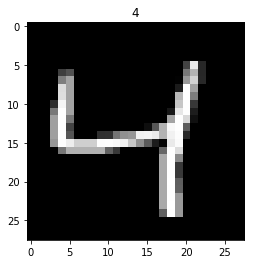

In [33]:
# plot one example
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[2].numpy(),cmap='gray')
plt.title("%i"%train_data.train_labels[2])
plt.show()

In [0]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        
        self.encoder = nn.Sequential(nn.Linear(28*28,128),
                                    nn.Tanh(),
                                    nn.Linear(128,64),
                                    nn.Tanh(),
                                    nn.Linear(64,12),
                                    nn.Tanh(),
                                    nn.Linear(12,3))
        
        self.decoder = nn.Sequential(nn.Linear(3,12),
                                    nn.Tanh(),
                                    nn.Linear(12,64),
                                    nn.Tanh(),
                                    nn.Linear(64,128),
                                    nn.Tanh(),
                                    nn.Linear(128,28*28),
                                    nn.Sigmoid())
        
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded,decoded

In [0]:
autoencoder = AutoEncoder()
optimizer = optim.Adam(autoencoder.parameters(),lr=learning_rate)
loss_fuc = nn.MSELoss()


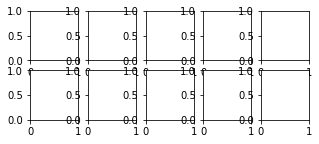

In [37]:
# initialize figure
f,a = plt.subplots(2,n_test_img,figsize=(5,2))
plt.ion()

In [39]:
view_data = train_data.train_data[:n_test_img].view(-1,28*28).type(torch.FloatTensor)/255
for i in range(n_test_img):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i],(28,28)),cmap='gray')
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())
    
for epoch in range(epochs):
    for step,(data,target) in enumerate(train_loader):
        data = data.view(-1,28*28)
        logits = data.view(-1,28*28)
        
        encoded,decoded = autoencoder(data)
        
        loss = loss_fuc(decoded,logits)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%100 == 0:
            print('Epoch:',epoch,'| Train Loss:%.4f'%loss.data.numpy())
            
            
            # plotting decoded image
            _,decoded_data = autoencoder(view_data)
            for i in range(n_test_img):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i],(28,28)),cmap='gray')
                a[1][i].set_xticks(());a[1][i].set_yticks(())
                
            plt.draw()
            plt.pause(0.05)
            
plt.ioff()
plt.show()

Epoch: 0 | Train Loss:0.2327


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


<Figure size 432x288 with 0 Axes>

Epoch: 0 | Train Loss:0.0680


<Figure size 432x288 with 0 Axes>

Epoch: 0 | Train Loss:0.0680


<Figure size 432x288 with 0 Axes>

Epoch: 0 | Train Loss:0.0659


<Figure size 432x288 with 0 Axes>

Epoch: 0 | Train Loss:0.0674


<Figure size 432x288 with 0 Axes>

Epoch: 0 | Train Loss:0.0629


<Figure size 432x288 with 0 Axes>

Epoch: 0 | Train Loss:0.0633


<Figure size 432x288 with 0 Axes>

Epoch: 0 | Train Loss:0.0587


<Figure size 432x288 with 0 Axes>

Epoch: 0 | Train Loss:0.0572


<Figure size 432x288 with 0 Axes>

Epoch: 0 | Train Loss:0.0554


<Figure size 432x288 with 0 Axes>

Epoch: 1 | Train Loss:0.0579


<Figure size 432x288 with 0 Axes>

Epoch: 1 | Train Loss:0.0575


<Figure size 432x288 with 0 Axes>

Epoch: 1 | Train Loss:0.0585


<Figure size 432x288 with 0 Axes>

Epoch: 1 | Train Loss:0.0538


<Figure size 432x288 with 0 Axes>

Epoch: 1 | Train Loss:0.0564


<Figure size 432x288 with 0 Axes>

Epoch: 1 | Train Loss:0.0553


<Figure size 432x288 with 0 Axes>

Epoch: 1 | Train Loss:0.0558


<Figure size 432x288 with 0 Axes>

Epoch: 1 | Train Loss:0.0583


<Figure size 432x288 with 0 Axes>

Epoch: 1 | Train Loss:0.0540


<Figure size 432x288 with 0 Axes>

Epoch: 1 | Train Loss:0.0574


<Figure size 432x288 with 0 Axes>

Epoch: 2 | Train Loss:0.0520


<Figure size 432x288 with 0 Axes>

Epoch: 2 | Train Loss:0.0493


<Figure size 432x288 with 0 Axes>

Epoch: 2 | Train Loss:0.0470


<Figure size 432x288 with 0 Axes>

Epoch: 2 | Train Loss:0.0516


<Figure size 432x288 with 0 Axes>

Epoch: 2 | Train Loss:0.0520


<Figure size 432x288 with 0 Axes>

Epoch: 2 | Train Loss:0.0535


<Figure size 432x288 with 0 Axes>

Epoch: 2 | Train Loss:0.0463


<Figure size 432x288 with 0 Axes>

Epoch: 2 | Train Loss:0.0532


<Figure size 432x288 with 0 Axes>

Epoch: 2 | Train Loss:0.0522


<Figure size 432x288 with 0 Axes>

Epoch: 2 | Train Loss:0.0520


<Figure size 432x288 with 0 Axes>

Epoch: 3 | Train Loss:0.0445


<Figure size 432x288 with 0 Axes>

Epoch: 3 | Train Loss:0.0511


<Figure size 432x288 with 0 Axes>

Epoch: 3 | Train Loss:0.0518


<Figure size 432x288 with 0 Axes>

Epoch: 3 | Train Loss:0.0509


<Figure size 432x288 with 0 Axes>

Epoch: 3 | Train Loss:0.0467


<Figure size 432x288 with 0 Axes>

Epoch: 3 | Train Loss:0.0457


<Figure size 432x288 with 0 Axes>

Epoch: 3 | Train Loss:0.0466


<Figure size 432x288 with 0 Axes>

Epoch: 3 | Train Loss:0.0515


<Figure size 432x288 with 0 Axes>

Epoch: 3 | Train Loss:0.0535


<Figure size 432x288 with 0 Axes>

Epoch: 3 | Train Loss:0.0488


<Figure size 432x288 with 0 Axes>

Epoch: 4 | Train Loss:0.0484


<Figure size 432x288 with 0 Axes>

Epoch: 4 | Train Loss:0.0479


<Figure size 432x288 with 0 Axes>

Epoch: 4 | Train Loss:0.0491


<Figure size 432x288 with 0 Axes>

Epoch: 4 | Train Loss:0.0473


<Figure size 432x288 with 0 Axes>

Epoch: 4 | Train Loss:0.0460


<Figure size 432x288 with 0 Axes>

Epoch: 4 | Train Loss:0.0491


<Figure size 432x288 with 0 Axes>

Epoch: 4 | Train Loss:0.0468


<Figure size 432x288 with 0 Axes>

Epoch: 4 | Train Loss:0.0413


<Figure size 432x288 with 0 Axes>

Epoch: 4 | Train Loss:0.0474


<Figure size 432x288 with 0 Axes>

Epoch: 4 | Train Loss:0.0517


<Figure size 432x288 with 0 Axes>

Epoch: 5 | Train Loss:0.0432


<Figure size 432x288 with 0 Axes>

Epoch: 5 | Train Loss:0.0474


<Figure size 432x288 with 0 Axes>

Epoch: 5 | Train Loss:0.0504


<Figure size 432x288 with 0 Axes>

Epoch: 5 | Train Loss:0.0459


<Figure size 432x288 with 0 Axes>

Epoch: 5 | Train Loss:0.0497


<Figure size 432x288 with 0 Axes>

Epoch: 5 | Train Loss:0.0476


<Figure size 432x288 with 0 Axes>

Epoch: 5 | Train Loss:0.0467


<Figure size 432x288 with 0 Axes>

Epoch: 5 | Train Loss:0.0498


<Figure size 432x288 with 0 Axes>

Epoch: 5 | Train Loss:0.0442


<Figure size 432x288 with 0 Axes>

Epoch: 5 | Train Loss:0.0467


<Figure size 432x288 with 0 Axes>

Epoch: 6 | Train Loss:0.0492


<Figure size 432x288 with 0 Axes>

Epoch: 6 | Train Loss:0.0474


<Figure size 432x288 with 0 Axes>

Epoch: 6 | Train Loss:0.0417


<Figure size 432x288 with 0 Axes>

Epoch: 6 | Train Loss:0.0500


<Figure size 432x288 with 0 Axes>

Epoch: 6 | Train Loss:0.0476


<Figure size 432x288 with 0 Axes>

Epoch: 6 | Train Loss:0.0461


<Figure size 432x288 with 0 Axes>

Epoch: 6 | Train Loss:0.0479


<Figure size 432x288 with 0 Axes>

Epoch: 6 | Train Loss:0.0464


<Figure size 432x288 with 0 Axes>

Epoch: 6 | Train Loss:0.0508


<Figure size 432x288 with 0 Axes>

Epoch: 6 | Train Loss:0.0508


<Figure size 432x288 with 0 Axes>

Epoch: 7 | Train Loss:0.0440


<Figure size 432x288 with 0 Axes>

Epoch: 7 | Train Loss:0.0476


<Figure size 432x288 with 0 Axes>

Epoch: 7 | Train Loss:0.0459


<Figure size 432x288 with 0 Axes>

Epoch: 7 | Train Loss:0.0481


<Figure size 432x288 with 0 Axes>

Epoch: 7 | Train Loss:0.0453


<Figure size 432x288 with 0 Axes>

Epoch: 7 | Train Loss:0.0495


<Figure size 432x288 with 0 Axes>

Epoch: 7 | Train Loss:0.0452


<Figure size 432x288 with 0 Axes>

Epoch: 7 | Train Loss:0.0486


<Figure size 432x288 with 0 Axes>

Epoch: 7 | Train Loss:0.0483


<Figure size 432x288 with 0 Axes>

Epoch: 7 | Train Loss:0.0430


<Figure size 432x288 with 0 Axes>

Epoch: 8 | Train Loss:0.0464


<Figure size 432x288 with 0 Axes>

Epoch: 8 | Train Loss:0.0453


<Figure size 432x288 with 0 Axes>

Epoch: 8 | Train Loss:0.0462


<Figure size 432x288 with 0 Axes>

Epoch: 8 | Train Loss:0.0446


<Figure size 432x288 with 0 Axes>

Epoch: 8 | Train Loss:0.0430


<Figure size 432x288 with 0 Axes>

Epoch: 8 | Train Loss:0.0499


<Figure size 432x288 with 0 Axes>

Epoch: 8 | Train Loss:0.0447


<Figure size 432x288 with 0 Axes>

Epoch: 8 | Train Loss:0.0477


<Figure size 432x288 with 0 Axes>

Epoch: 8 | Train Loss:0.0422


<Figure size 432x288 with 0 Axes>

Epoch: 8 | Train Loss:0.0405


<Figure size 432x288 with 0 Axes>

Epoch: 9 | Train Loss:0.0467


<Figure size 432x288 with 0 Axes>

Epoch: 9 | Train Loss:0.0409


<Figure size 432x288 with 0 Axes>

Epoch: 9 | Train Loss:0.0451


<Figure size 432x288 with 0 Axes>

Epoch: 9 | Train Loss:0.0453


<Figure size 432x288 with 0 Axes>

Epoch: 9 | Train Loss:0.0439


<Figure size 432x288 with 0 Axes>

Epoch: 9 | Train Loss:0.0474


<Figure size 432x288 with 0 Axes>

Epoch: 9 | Train Loss:0.0462


<Figure size 432x288 with 0 Axes>

Epoch: 9 | Train Loss:0.0441


<Figure size 432x288 with 0 Axes>

Epoch: 9 | Train Loss:0.0443


<Figure size 432x288 with 0 Axes>

Epoch: 9 | Train Loss:0.0506


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


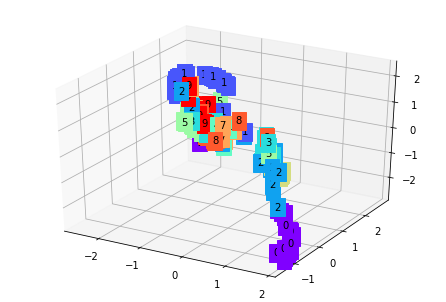

In [42]:
# visualize in 3D plot
view_data = train_data.train_data[:200].view(-1,28*28).type(torch.FloatTensor)/255
encoded_data,_ = autoencoder(view_data)
fig = plt.figure(2)
ax = Axes3D(fig)
X,Y,Z = encoded_data.data[:,0].numpy(),encoded_data.data[:,1].numpy(),encoded_data.data[:,2].numpy()
values = train_data.train_labels[:200].numpy()

for x,y,z,s in zip(X,Y,Z,values):
    c = cm.rainbow(int(255*s/9))
    ax.text(x,y,z,s,backgroundcolor=c)

ax.set_xlim(X.min(),X.max())
ax.set_ylim(Y.min(),Y.max())
ax.set_zlim(Z.min(),Z.max())

plt.show()